In [1]:
import torch
from utils import LQR_1D_true_solution
from bases import bases_poly, d_bases_poly, sec_bases_poly, bases_2d
from main_phibe import phibe_finder_1D_LQR
from main_RL import RL_finder_1D_LQR
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [2]:
torch.set_default_dtype(torch.float64)
device = torch.device("cpu")

In [3]:
def reward(s, a):
    return - Q * (s**2) - R * (a**2)

In [4]:
A = 1
B = 1
sig = 1
R = 1
Q = 1
beta = 0.01
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-2.4056824589538213 tensor([-240.5682,    0.0000,   -2.4057])


In [5]:
b_init = - 1.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -3
bd_upper_s = 3.
bd_low_b = -3.
bd_upper_b = 3.
bd_low_a = -3.
bd_upper_a = 3
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 2
order = 1
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin:   0%|          | 0/80 [00:00<?, ?it/s]

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:01<00:00, 74.38it/s]


In [6]:
b_init = - 1.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -3
bd_upper_s = 3.
bd_low_b = -3.
bd_upper_b = 3.
bd_low_a = -3.
bd_upper_a = 3
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 2
order = 2
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin:   0%|          | 0/80 [00:00<?, ?it/s]

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 80/80 [00:01<00:00, 73.26it/s]


In [7]:
b_init = - 1.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -3
bd_upper_s = 3.
bd_low_b = -3.
bd_upper_b = 3.
bd_low_a = -3.
bd_upper_a = 3
bases_Q = bases_2d
num_iter = 30
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 2
order = 1
true_V = True_V
simple_basis = False
b_val_RL, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 30/30 [00:00<00:00, 88.50it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


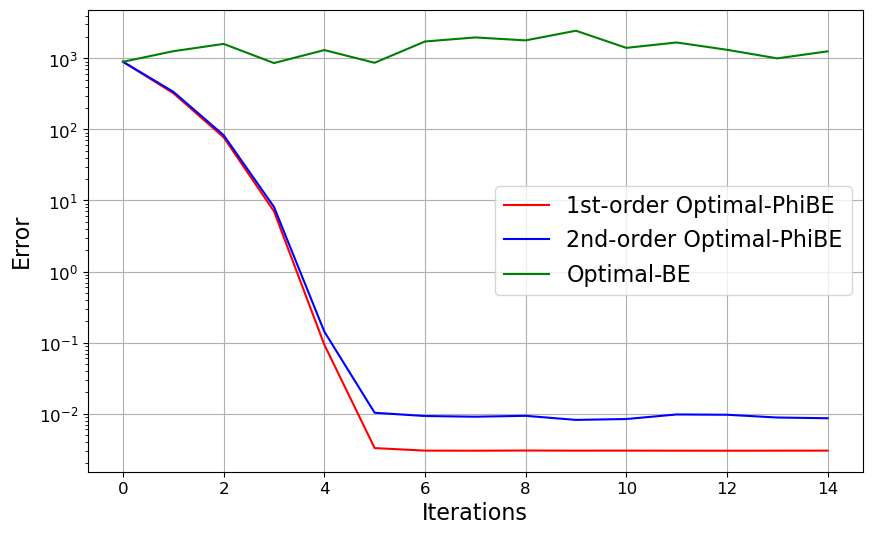

In [8]:
x_tensor = torch.arange(15)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:15], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:15], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:15], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("LQR/1d_s/1.eps", format='eps')
plt.show()

In [9]:
A = 1
B = 0.1
sig = 1.
R = 1
Q = 1
beta = 0.01
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-19.950124999218758 tensor([-19950.1250,      0.0000,   -199.5012])


In [10]:
b_init = - 10.1
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -30
bd_upper_s = 30.
bd_low_b = -30.
bd_upper_b = 30.
bd_low_a = -30.
bd_upper_a = 30
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 1
order = 1
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:00<00:00, 80.47it/s]


In [11]:
b_init = - 10.1
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -30
bd_upper_s = 30.
bd_low_b = -30.
bd_upper_b = 30.
bd_low_a = -30.
bd_upper_a = 30
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 1
order = 2
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 80/80 [00:01<00:00, 75.04it/s]


In [12]:
b_init = - 10.1
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -30
bd_upper_s = 30.
bd_low_b = -30.
bd_upper_b = 30.
bd_low_a = -30.
bd_upper_a = 30
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 1
order = 1
true_V = True_V
simple_basis = False
b_val_RL, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 80/80 [00:00<00:00, 92.89it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


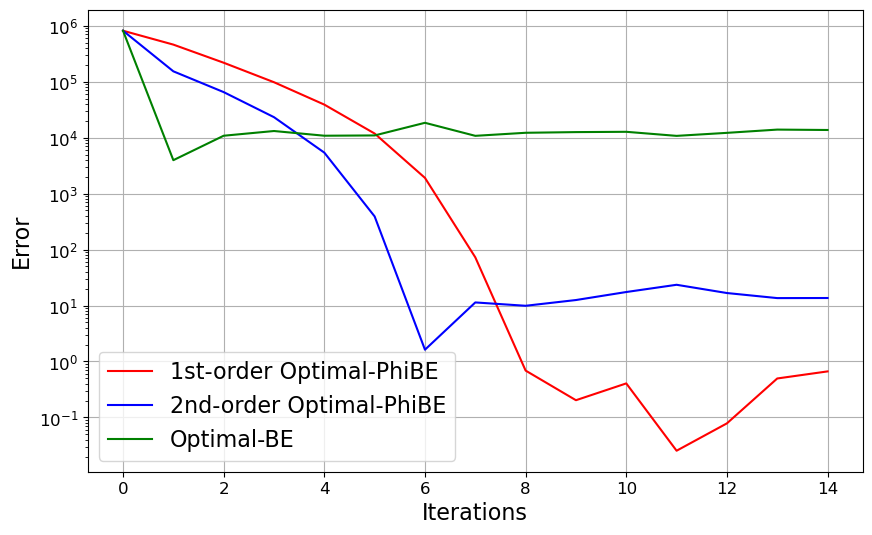

In [13]:
x_tensor = torch.arange(15)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:15], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:15], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:15], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("LQR/1d_s/2.eps", format='eps')
plt.show()

In [14]:
A = 1
B = 1
sig = 1.
R = 0.01
Q = 100
beta = 2.
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-100.0 tensor([-0.5000,  0.0000, -1.0000])


In [15]:
b_init = - 20
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.1
order = 1
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:00<00:00, 89.90it/s] 


In [16]:
b_init = - 20
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.1
order = 2
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 80/80 [00:00<00:00, 103.37it/s]


In [17]:
b_init = - 20
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -300
bd_upper_s = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 0.1
order = 1
true_V = True_V
simple_basis = False
b_val_RL_3, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 80/80 [00:00<00:00, 99.79it/s] 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


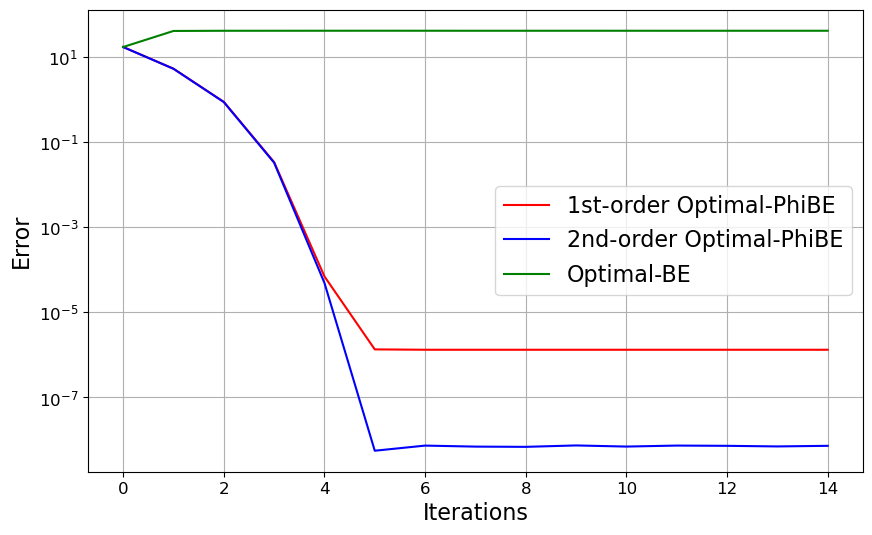

In [18]:
x_tensor = torch.arange(15)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:15], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:15], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:15], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("LQR/1d_s/3.eps", format='eps')
plt.show()

In [19]:
A = 100
B = 1
sig = 1.
R = 1
Q = 1
beta = 0.01
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-199.995000125 tensor([-19999.5000,      0.0000,   -199.9950])


In [20]:
b_init = - 100.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.01
order = 1
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:01<00:00, 78.00it/s]


In [21]:
b_init = - 100.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.01
order = 2
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 80/80 [00:00<00:00, 86.16it/s]


In [22]:
b_init = - 100.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e4)
bd_low_s = -300
bd_upper_s = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 0.01
order = 1
true_V = True_V
simple_basis = False
b_val_RL, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 80/80 [00:00<00:00, 95.80it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


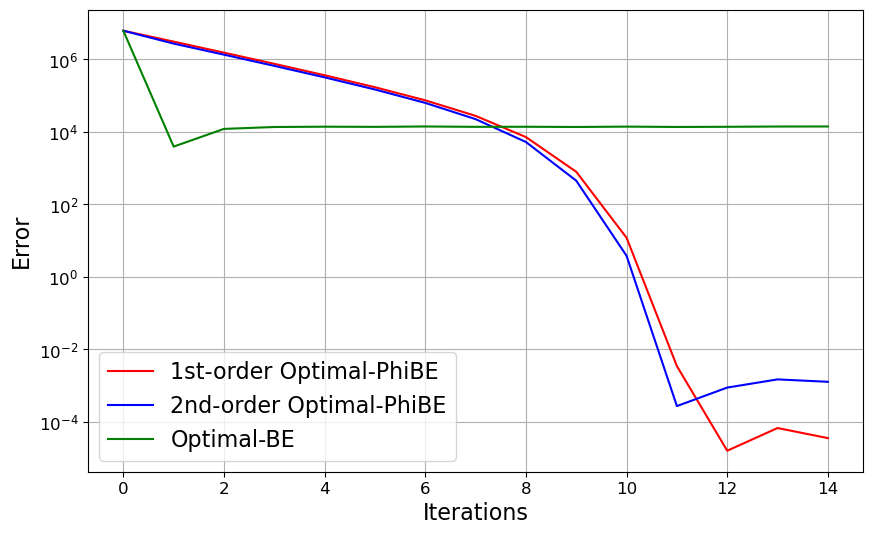

In [23]:
x_tensor = torch.arange(15)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:15], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:15], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:15], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("LQR/1d_s/4.eps", format='eps')
plt.show()